# Exploratory Analysis

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

from diabetes.data import read_data, health_check, save_data
from diabetes.visualisation import value_counts
from diabetes.preprocessing import clean_data
from diabetes.feature_engineering import add_features
from scipy.stats.mstats import winsorize

In [2]:
df = read_data()

------------------------------
Data ingestion complete: 
   Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6   
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   
3   4            1       89             66             23       94  28.1   
4   5            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
health_check(df)

Total null fields per column:
Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
------------------------------
Total duplicated rows: 0
------------------------------
Here are the data types:
Id                            int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


# Univariate analysis
## Target Variable

In [4]:
df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


The values within this Outcome are : 
Outcome
0    1816
1     952
Name: count, dtype: int64
------------------------------


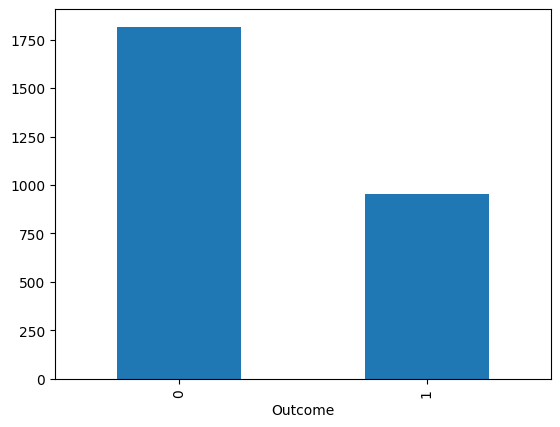

In [5]:
value_counts(df, "Outcome")

Data is unbalanced with roughly 66% to 0 and 33% to 1 (the person has diabetes)

## Skewness and Outliers

In [6]:
# Calculate skewness for all numerical columns
skewness_scores = df.select_dtypes(include=['number']).skew().sort_values(ascending=False)
print(skewness_scores)

Insulin                     2.078111
DiabetesPedigreeFunction    1.842791
Age                         1.166299
Pregnancies                 0.959096
Outcome                     0.657465
SkinThickness               0.180841
Glucose                     0.162864
Id                          0.000000
BMI                        -0.176576
BloodPressure              -1.850450
dtype: float64


How to interpret the score:
- 1> or <−1: Highly skewed (Likely needs transformation).
- 0.5 to 1 (or −0.5 to −1): Moderately skewed.
- −0.5 to 0.5: Symmetrical (Normal enough for most models).

Check BloodPressure, Age, DiabetesPedigreeFunction, Insulin

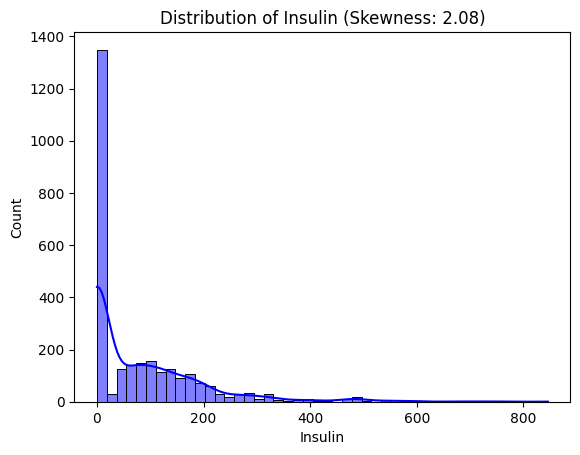

In [7]:
# plotting a highly skewed variable 'Insulin'
sns.histplot(df['Insulin'], kde=True, color='blue')
plt.title(f"Distribution of Insulin (Skewness: {df['Insulin'].skew():.2f})")
plt.show()

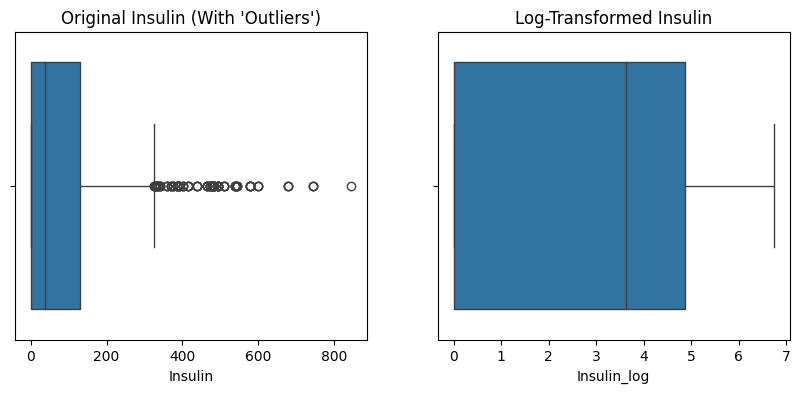

In [8]:
# visualization before
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Insulin'])
plt.title("Original Insulin (With 'Outliers')")

# log Transform (using log1p to handle zeros)
df['Insulin_log'] = np.log1p(df['Insulin'])

# visualization after
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Insulin_log'])
plt.title("Log-Transformed Insulin")
plt.show()

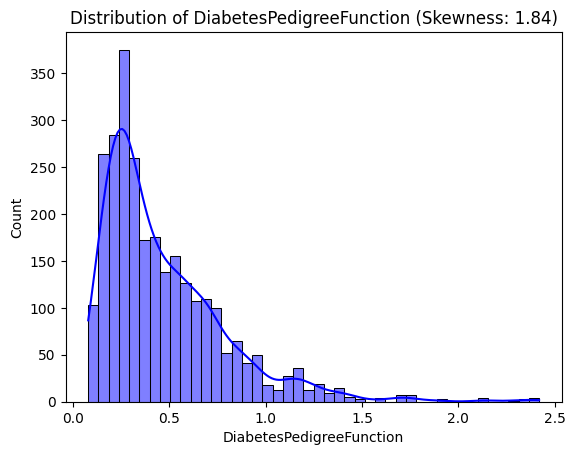

In [9]:
# plotting a highly skewed variable 'DiabetesPedigreeFunction'
sns.histplot(df['DiabetesPedigreeFunction'], kde=True, color='blue')
plt.title(f"Distribution of DiabetesPedigreeFunction (Skewness: {df['DiabetesPedigreeFunction'].skew():.2f})")
plt.show()

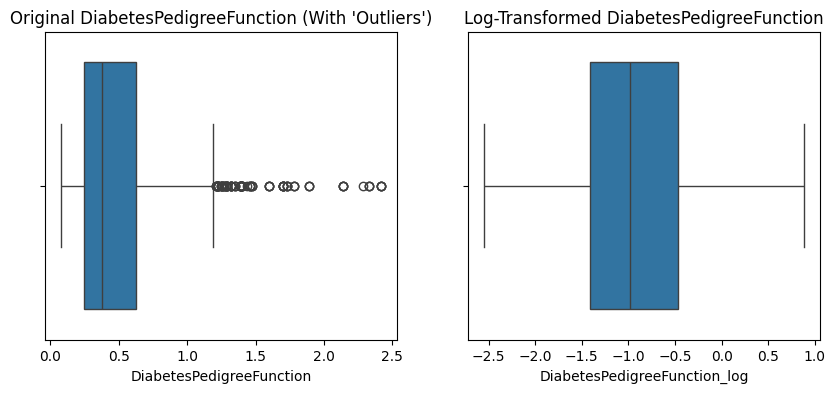

In [10]:
# visualization before
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['DiabetesPedigreeFunction'])
plt.title("Original DiabetesPedigreeFunction (With 'Outliers')")

# log Transform (using logp since no zeros)
df['DiabetesPedigreeFunction_log'] = np.log(df['DiabetesPedigreeFunction'])

# visualization after
plt.subplot(1, 2, 2)
sns.boxplot(x=df['DiabetesPedigreeFunction_log'])
plt.title("Log-Transformed DiabetesPedigreeFunction")
plt.show()

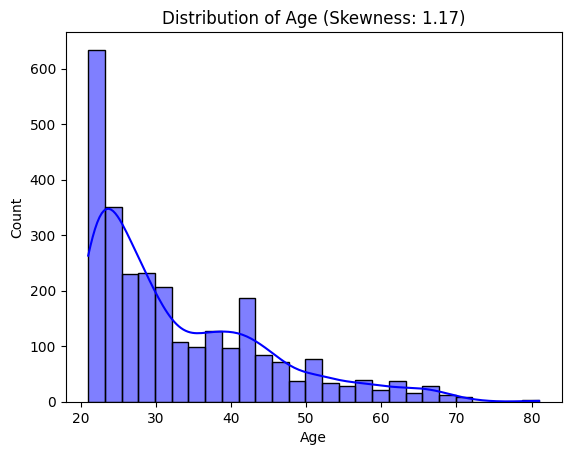

In [11]:
# plotting a highly skewed variable 'Age'
sns.histplot(df['Age'], kde=True, color='blue')
plt.title(f"Distribution of Age (Skewness: {df['Age'].skew():.2f})")
plt.show()

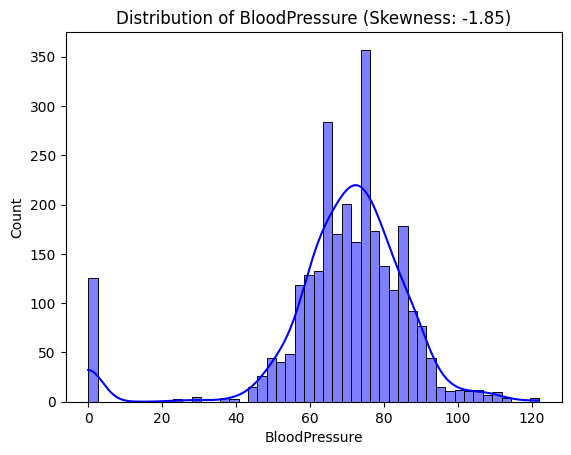

In [12]:
# plotting a highly skewed variable 'BloodPressure'
sns.histplot(df['BloodPressure'], kde=True, color='blue')
plt.title(f"Distribution of BloodPressure (Skewness: {df['BloodPressure'].skew():.2f})")
plt.show()

/Users/sajid.ahmed1/Desktop/Coding/diabetes/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


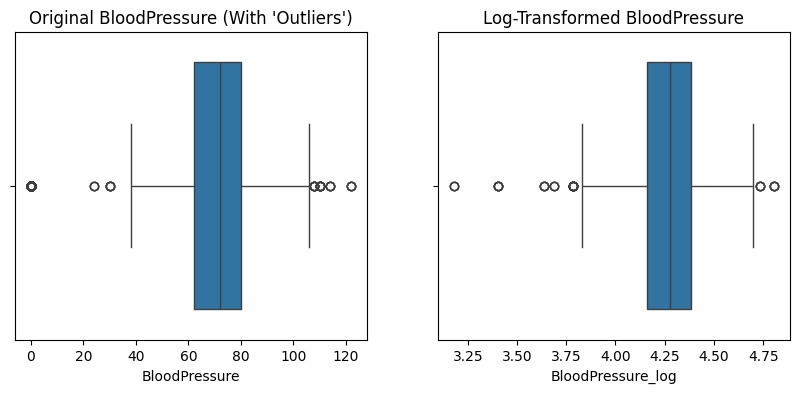

In [13]:
# visualization before
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['BloodPressure'])
plt.title("Original BloodPressure (With 'Outliers')")

# log Transform (using logp since no zeros)
df['BloodPressure_log'] = np.log(df['BloodPressure'])

# visualization after
plt.subplot(1, 2, 2)
sns.boxplot(x=df['BloodPressure_log'])
plt.title("Log-Transformed BloodPressure")
plt.show()

After logging the BloodPressure data, there are still some outliers on both ends. This means we need to understand why the outliers are there, if it's correct or incorrect numbers. If the outliers should be kept, then we should log -> winsorize -> RobustScaler.

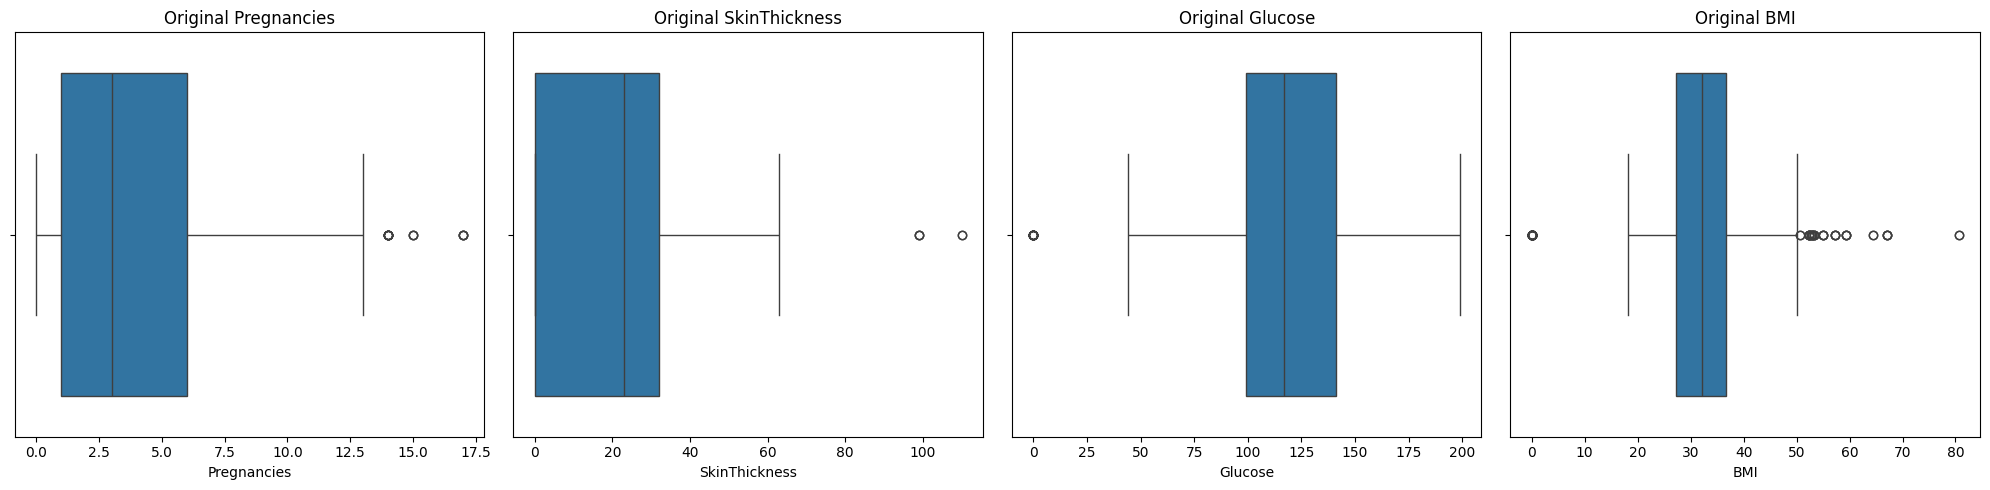

In [14]:
cols = ['Pregnancies', 'SkinThickness', 'Glucose', 'BMI']
plt.figure(figsize=(20, 5))

for i, column in enumerate(cols, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(x=df[column])
    plt.title(f"Original {column}")

plt.tight_layout()
plt.show()

What's the plan here?
- Pregnancies, BMI and Skinthickness can be winsorized
- Glucose and BMI need to be imputed with Mean and Median respectively for the 0 values because they are not physically possible. Mean can be used as the data is not affected by extreme values (no outliers) and Median for BMI because it has skewed and extreme values.
So we will impute -> log -> winsorize -> scale

In [15]:
# cleaned dataset
# reminder of the plan
# Impute 0's in Glucose (Mean), BMI (Median), BloodPressure (Median)
# Log Insulin, DiabetesPedigreeFunction, BloodPressure
# Keep Age untouched
# Winsorize Pregnancies, SkinThickness, BloodPressure_log, BMI
# Final DF will be the cleaned one whilst removing the non-logged versions of the logged features
df = read_data()
# 1. Impute (Fix the Zeros)
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'][df['Glucose'] != 0].mean())
df['BMI'] = df['BMI'].replace(0, df['BMI'][df['BMI'] != 0].median())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'][df['BloodPressure'] != 0].median())

# 2. Log Transform
df['Insulin_log'] = np.log1p(df['Insulin']) # use log1p in case any 0s remain
df['DPF_log'] = np.log1p(df['DiabetesPedigreeFunction'])
df['BloodPressure_log'] = np.log1p(df['BloodPressure'])

# 3. Winsorize (using scipy)
df['Pregnancies'] = winsorize(df['Pregnancies'], limits=[0, 0.01])
df['SkinThickness'] = winsorize(df['SkinThickness'], limits=[0, 0.01])
df['BloodPressure_log'] = winsorize(df['BloodPressure_log'], limits=[0, 0.01])
df['BMI'] = winsorize(df['BMI'], limits=[0, 0.01])

# 4. Final Selection
final_cols = ['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'Age', 
              'Insulin_log', 'DPF_log', 'BloodPressure_log', 'Outcome']
clean_df = df[final_cols]
clean_df.head()

------------------------------
Data ingestion complete: 
   Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6   
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   
3   4            1       89             66             23       94  28.1   
4   5            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


,Pregnancies,Glucose,SkinThickness,BMI,Age,Insulin_log,DPF_log,BloodPressure_log,Outcome
0,6,148.0,35,33.6,50,0.000000,0.486738,4.290459,1
1,1,85.0,29,26.6,31,0.000000,0.300845,4.204693,0
2,8,183.0,0,23.3,32,0.000000,0.514021,4.174387,1
3,1,89.0,23,28.1,21,4.553877,0.154436,4.204693,0
4,0,137.0,35,43.1,33,5.129899,1.190279,3.713572,1


# Bivariate analysis
## Correlation heatmap

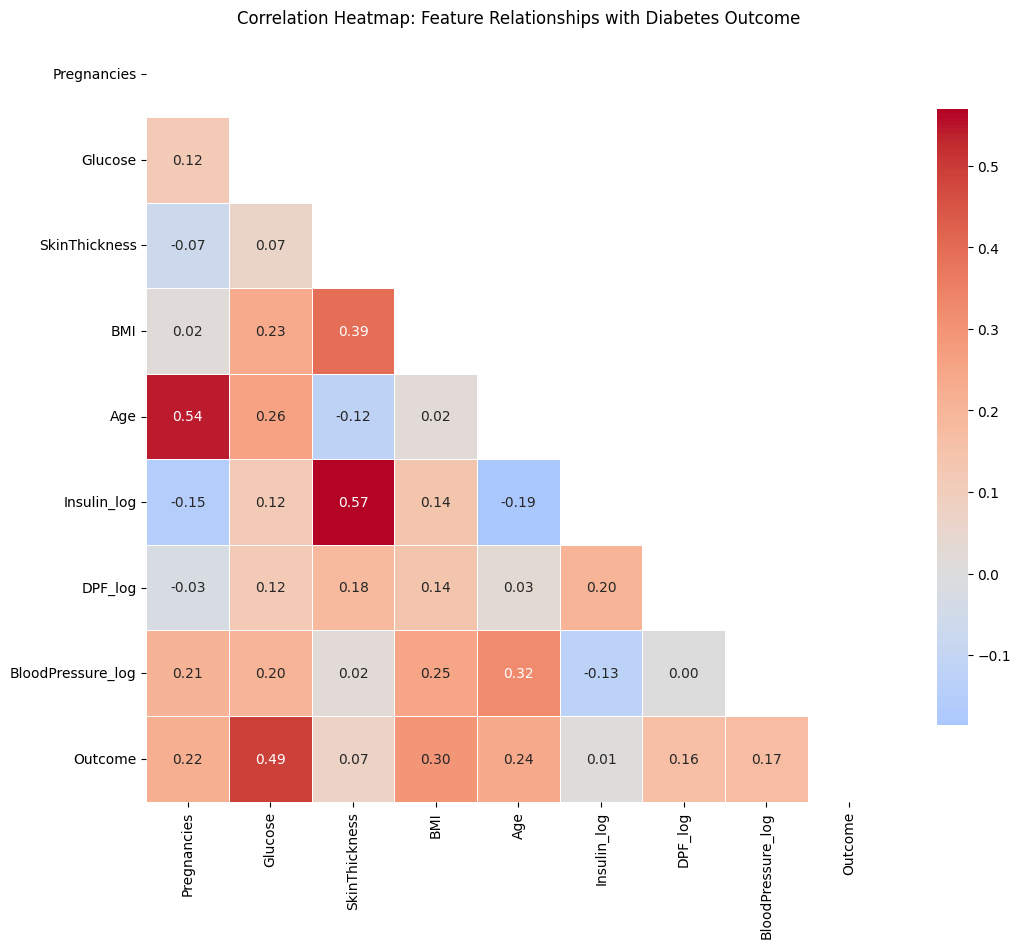

In [16]:
# 1. Calculate the correlation matrix
# We focus on the 'Outcome' column to see which features matter most
corr_matrix = clean_df.corr()

# 2. Set up the figure
plt.figure(figsize=(12, 10))

# 3. Create a mask to hide the upper triangle (optional, but looks professional)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 4. Generate the heatmap
sns.heatmap(corr_matrix, 
            mask=mask, 
            annot=True,          # Show the numbers
            fmt=".2f",           # Two decimal places
            cmap='coolwarm',     # Red for positive, Blue for negative
            center=0,            # 0 is the neutral color (white/grey)
            linewidths=.5,       # Add gaps between squares
            cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap: Feature Relationships with Diabetes Outcome')
plt.show()

In [17]:
# Create the 'Teamwork' feature
clean_df['Glucose_Insulin_Interaction'] = clean_df['Glucose'] * clean_df['Insulin_log']
clean_df['BMI_Insulin_Interaction'] = clean_df['BMI'] * clean_df['Insulin_log']
clean_df['Age_Insulin_Interaction'] = clean_df['Age'] * clean_df['Insulin_log']

# Check the new correlation with the Outcome
new_corr = clean_df[['Glucose', 'Insulin_log', 'Glucose_Insulin_Interaction','BMI_Insulin_Interaction','Age_Insulin_Interaction', 'Outcome']].corr()
print(new_corr['Outcome'])

Glucose                        0.489335
Insulin_log                    0.006713
Glucose_Insulin_Interaction    0.121242
BMI_Insulin_Interaction        0.051742
Age_Insulin_Interaction        0.111064
Outcome                        1.000000
Name: Outcome, dtype: float64


/var/folders/6t/n8yyc0s16xz37pwtwnwdy2000000gn/T/ipykernel_37340/670038750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Glucose_Insulin_Interaction'] = clean_df['Glucose'] * clean_df['Insulin_log']
/var/folders/6t/n8yyc0s16xz37pwtwnwdy2000000gn/T/ipykernel_37340/670038750.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['BMI_Insulin_Interaction'] = clean_df['BMI'] * clean_df['Insulin_log']
/var/folders/6t/n8yyc0s16xz37pwtwnwdy2000000gn/T/ipykernel_37340/670038750.py:4: SettingWi

In [18]:
# Final selection after interaction terms
final_cols = ['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'Age', 
              'Insulin_log', 'DPF_log', 'BloodPressure_log','Glucose_Insulin_Interaction','Age_Insulin_Interaction', 'Outcome']
clean_df = clean_df[final_cols]
clean_df.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age,Insulin_log,DPF_log,BloodPressure_log,Glucose_Insulin_Interaction,Age_Insulin_Interaction,Outcome
0,6,148.0,35,33.6,50,0.000000,0.486738,4.290459,0.000000,0.000000,1
1,1,85.0,29,26.6,31,0.000000,0.300845,4.204693,0.000000,0.000000,0
2,8,183.0,0,23.3,32,0.000000,0.514021,4.174387,0.000000,0.000000,1
3,1,89.0,23,28.1,21,4.553877,0.154436,4.204693,405.295043,95.631415,0
4,0,137.0,35,43.1,33,5.129899,1.190279,3.713572,702.796124,169.286658,1


In [19]:
df = read_data()

------------------------------
Data ingestion complete: 
   Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6   
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   
3   4            1       89             66             23       94  28.1   
4   5            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [20]:
df = clean_data(df)

------------------------------
Cleaned data complete: 
   Pregnancies  Glucose  SkinThickness   BMI  Age  Insulin_log   DPF_log  \
0            6    148.0             35  33.6   50     0.000000  0.486738   
1            1     85.0             29  26.6   31     0.000000  0.300845   
2            8    183.0              0  23.3   32     0.000000  0.514021   
3            1     89.0             23  28.1   21     4.553877  0.154436   
4            0    137.0             35  43.1   33     5.129899  1.190279   

   BloodPressure_log  Outcome  
0           4.290459        1  
1           4.204693        0  
2           4.174387        1  
3           4.204693        0  
4           3.713572        1  


In [21]:
df = add_features(df)
SAVE_PATH = Path.cwd().parent / "data"
save_data(df, SAVE_PATH)

------------------------------
Features added complete: 
   Pregnancies  Glucose  SkinThickness   BMI  Age  Insulin_log   DPF_log  \
0            6    148.0             35  33.6   50     0.000000  0.486738   
1            1     85.0             29  26.6   31     0.000000  0.300845   
2            8    183.0              0  23.3   32     0.000000  0.514021   
3            1     89.0             23  28.1   21     4.553877  0.154436   
4            0    137.0             35  43.1   33     5.129899  1.190279   

   BloodPressure_log  Outcome  Glucose_Insulin_Interaction  \
0           4.290459        1                     0.000000   
1           4.204693        0                     0.000000   
2           4.174387        1                     0.000000   
3           4.204693        0                   405.295043   
4           3.713572        1                   702.796124   

   Age_Insulin_Interaction  
0                 0.000000  
1                 0.000000  
2                 0.000000

PosixPath('/Users/sajid.ahmed1/Desktop/Coding/diabetes/data/cleaned_data.parquet')